In [1]:
library(tidyverse)
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
library(e1071)
library(mosaic)

dfSC = read.csv("CumulativeCases.csv", header = T)
dfSD = read.csv("TotalDeaths.csv", header = T)
dfCC = read.csv("CumulCases2020.csv")
dfCD = read.csv("TotalDeaths2020.csv")

dfW_7 = read.csv("WHOselect7.csv", header = T)

cumulSC = read.csv("Cumulative.csv")
totDLD = read.csv("TotalDeathsLD.csv")

dfC3 = read.csv("CulumNon-Interpolated2003.csv", header = T)
dfD3 = read.csv("DeathNon-Interpolated2003.csv", header = T)
dfR3 = read.csv("RecoveredNon-Interpolated2003.csv", header = T)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: lattice

Loading required package: ggformula

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh



New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Loading required package: mosaicData

Loading required package: Matrix


Attaching package: ‘Matrix’


The following obj

In [2]:
sapply(cumulSC, class)

X    Canada.2003   Germany.2003     Italy.2003 Singapore.2003 
      "factor"      "integer"      "integer"      "integer"      "integer" 
       US.2003   Vietnam.2003     China.2003    Canada.2020     China.2020 
     "integer"      "integer"      "integer"      "integer"      "integer" 
  Germany.2020     Italy.2020 Singapore.2020        US.2020   Vietnam.2020 
     "integer"      "integer"      "integer"      "integer"      "integer"

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each selected country during the 2003 SARS outbreak. 

Skewness:  1.614755 
Kurtosis:  0.7856613

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,36.5,206,236,7084,1120.571,2631.596,7,0


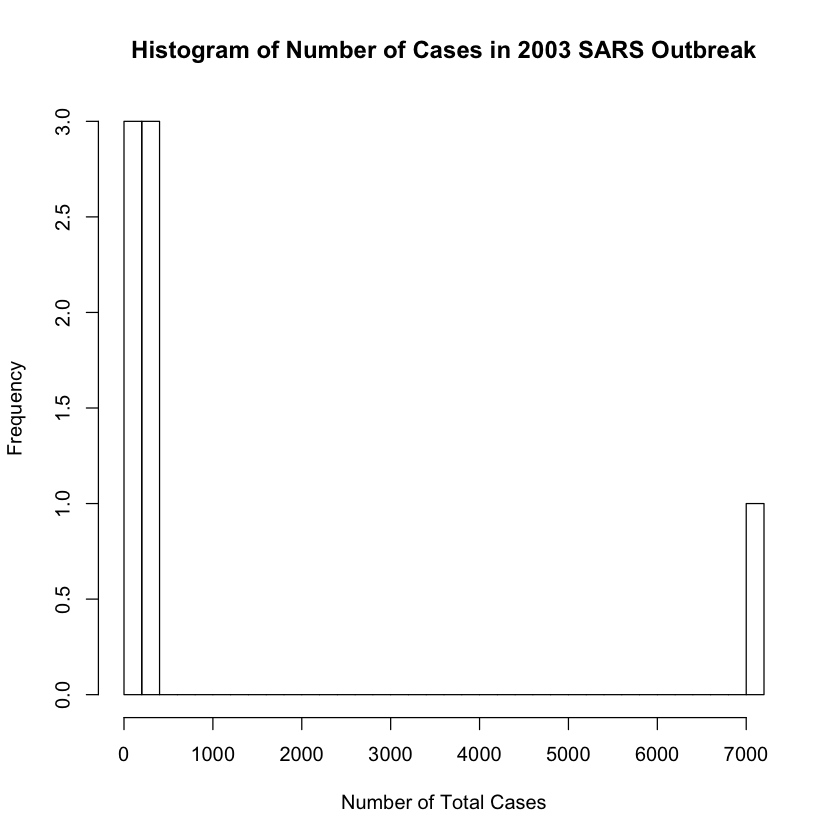

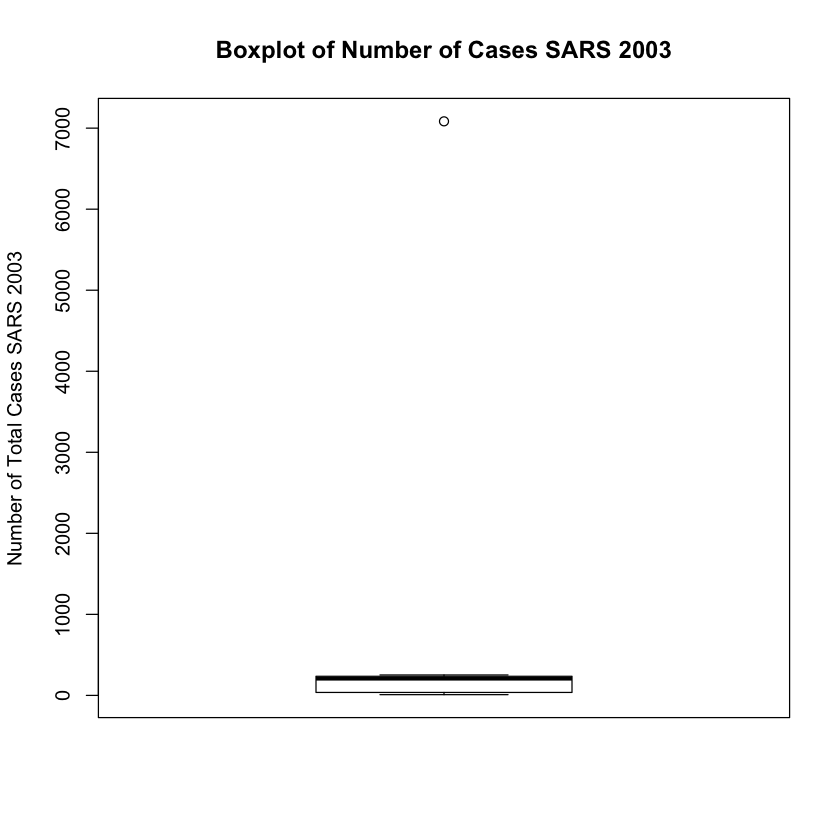

In [3]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)
hist(t2003, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Number of Total Cases SARS 2003", main = "Boxplot of Number of Cases SARS 2003")

The distribution is positively skewed and has heavier tails. The number of cumulative cases in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each selected country during the 2003 SARS outbreak (excluding China). 

Skewness:  -0.02329566 
Kurtosis:  -2.186801

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,23.25,134.5,216.5,252,126.6667,111.5557,6,0


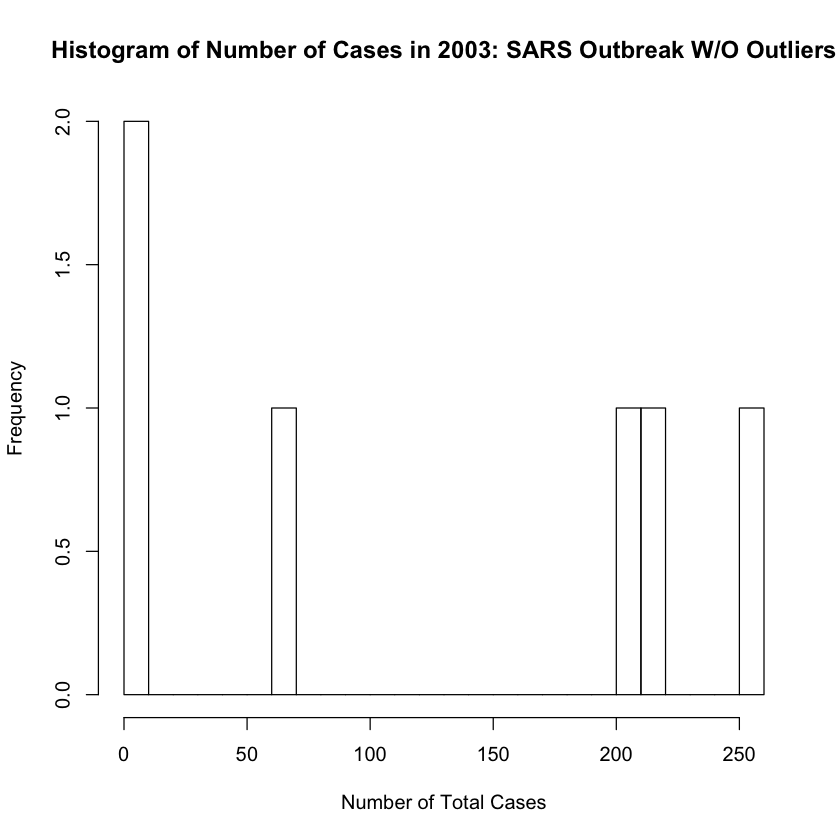

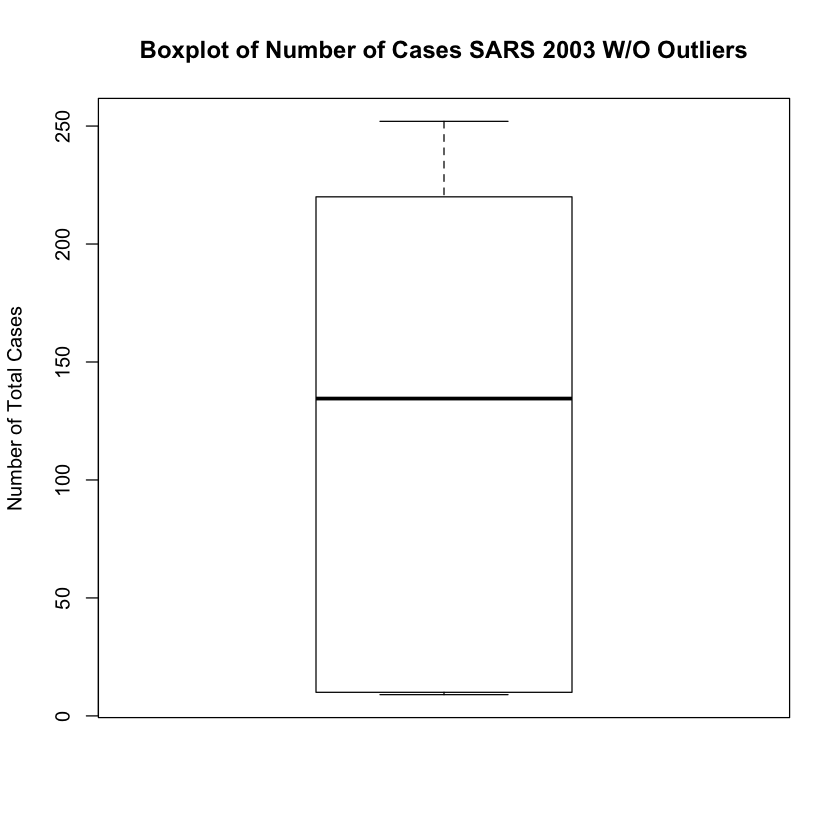

In [4]:
t2003_2 = c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003)
hist(t2003_2, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003: SARS Outbreak W/O Outliers", breaks = 20)
skew <- skewness(t2003_2)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003_2)
cat("Kurtosis: ", k)

favstats(t2003_2)
boxplot(t2003_2, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases SARS 2003 W/O Outliers")

The skew decreased significantly after the removal of China's 2003 SARS cumulative case data. According to the skew value, the distribution is almost completely normal. The kurtosis value indicates that the new distribution has light tails.  

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each selected country during the 2020 COVID-19 outbreak. 

Skewness:  0.2142627 
Kurtosis:  -1.75893

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,188,3562,62095,89905.5,140886,55729.14,55214.49,7,0


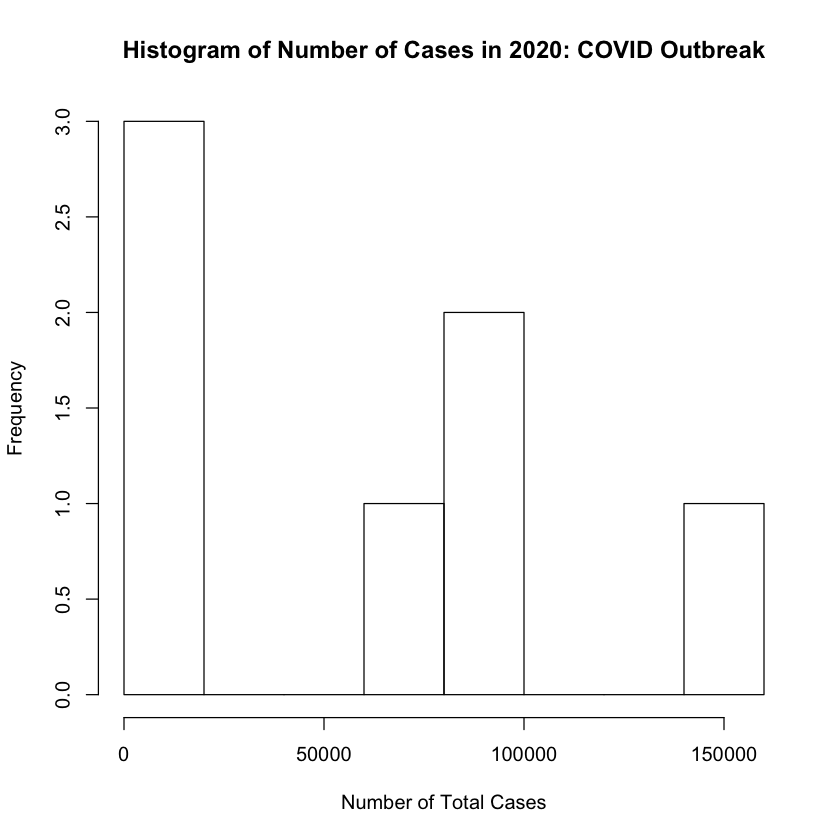

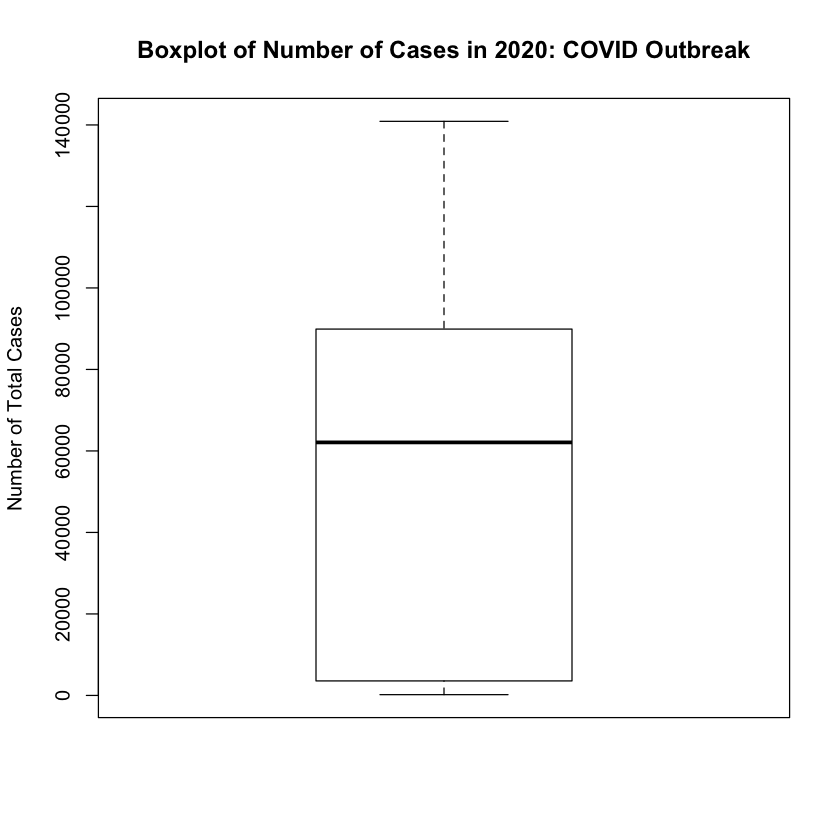

In [5]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)
hist(t2020, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases in 2020: COVID Outbreak")

The distribution is slightly positively skewed and is not completely normal. No outliers were found in this data. The kurtosis was a large negative value, which means that the distribution had light tails. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the 2003 SARS outbreak.

Skewness:  1.60474 
Kurtosis:  0.764864

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,5,35,646,103,239.9812,7,0


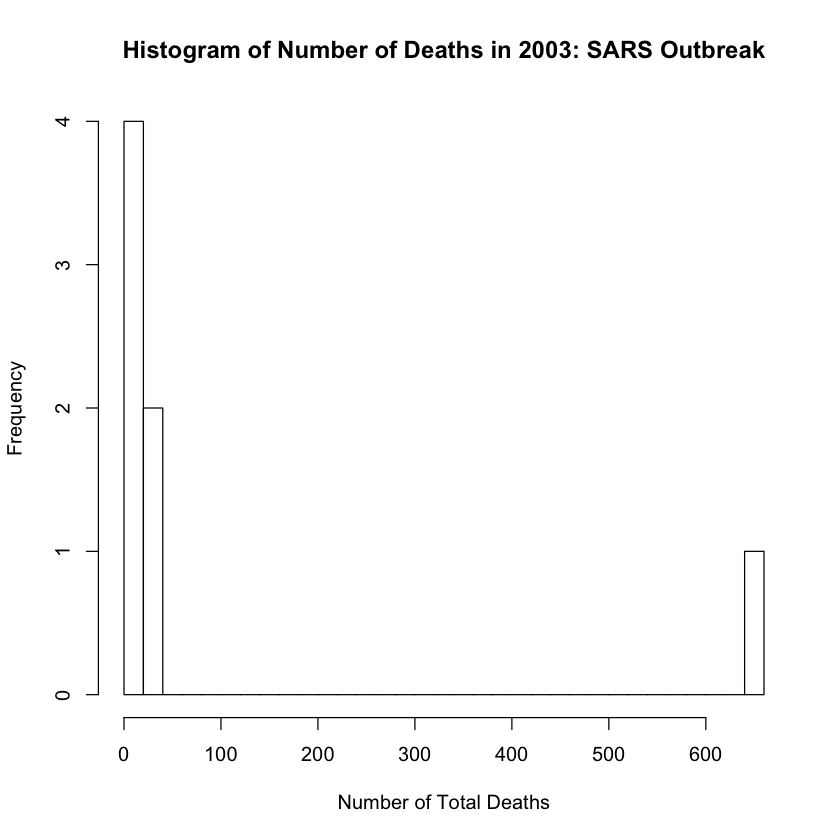

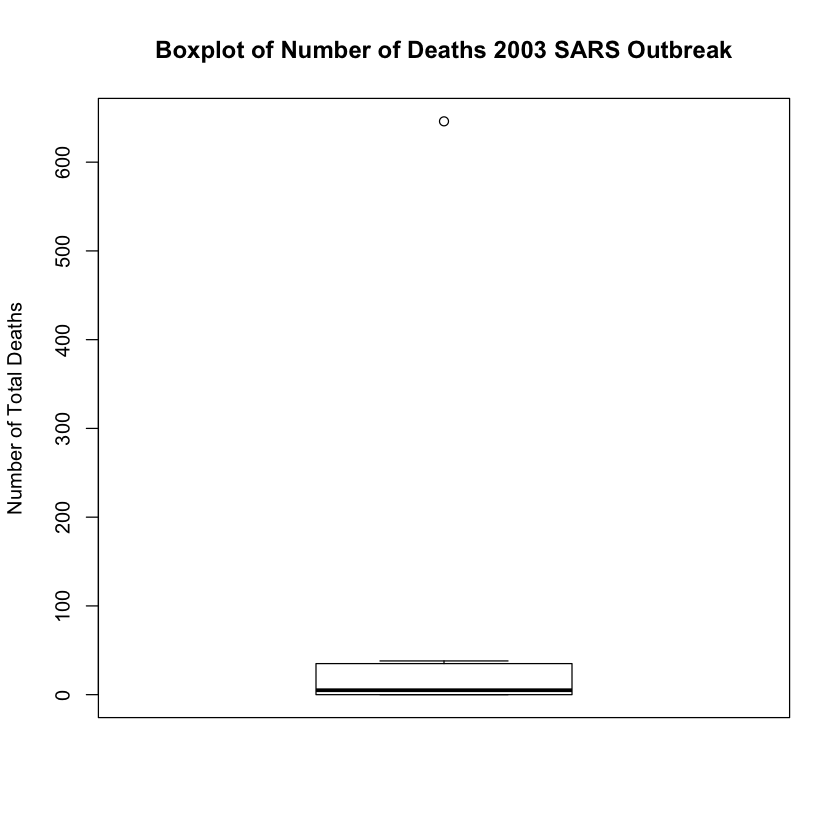

In [6]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak", breaks = 25)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

The distribution is positively skewed and has heavier tails. The total deaths in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the 2003 SARS outbreak (excluding China).

Skewness:  0.5380714 
Kurtosis:  -1.8913

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,2.5,25.25,38,12.5,17.63803,6,0


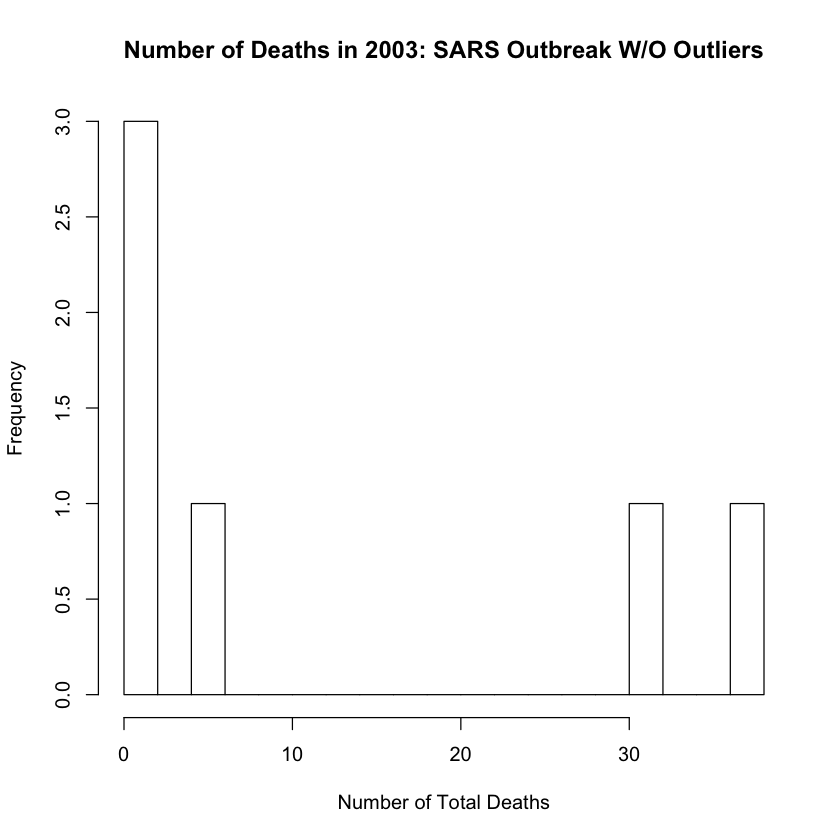

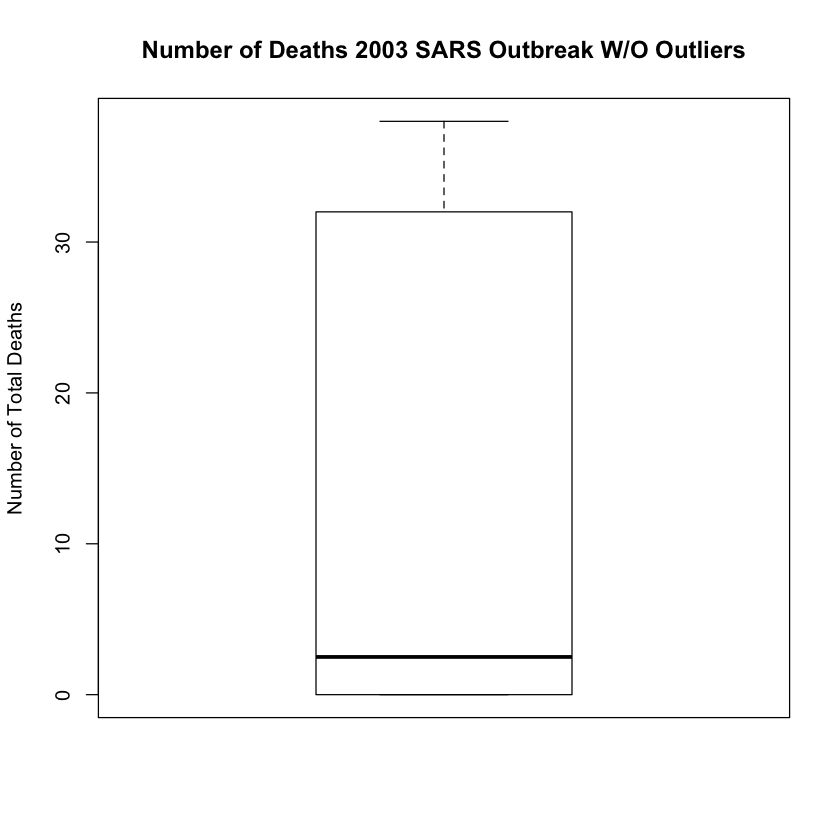

In [7]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Number of Deaths in 2003: SARS Outbreak W/O Outliers", breaks = 15)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Number of Deaths 2003 SARS Outbreak W/O Outliers")

The removal of China created a new distribution with lighter tails. The distribution is still positively skewed. However, the removal of China significantly lowered the skewness of the data. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the COVID-19 outbreak.

Skewness:  1.268456 
Kurtosis:  0.03153421

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,33.5,533,2885.5,10779,2450,3904.272,7,0


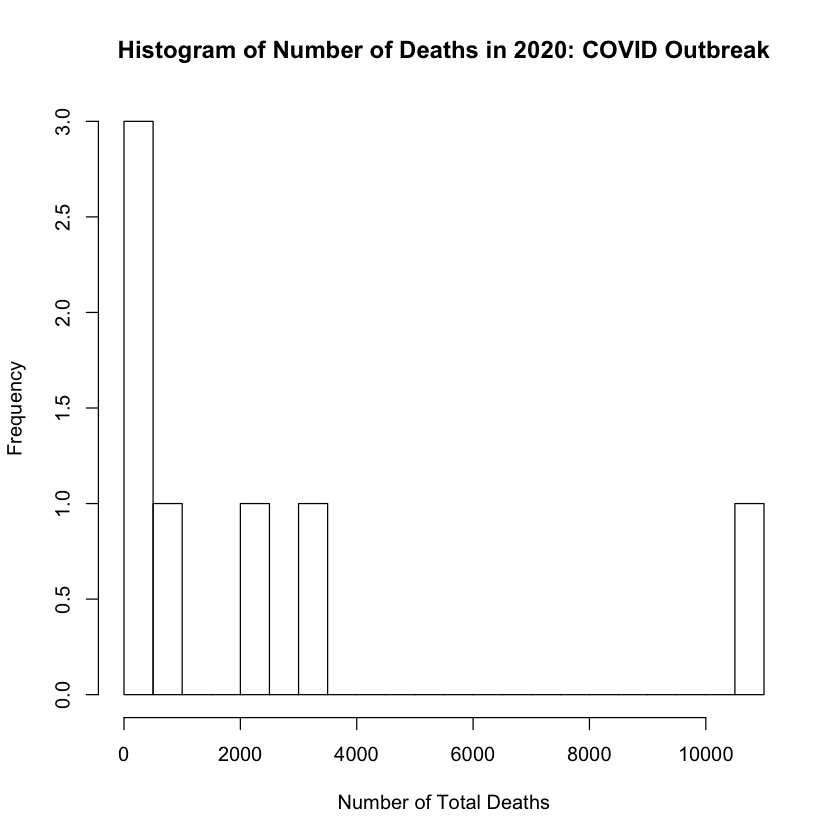

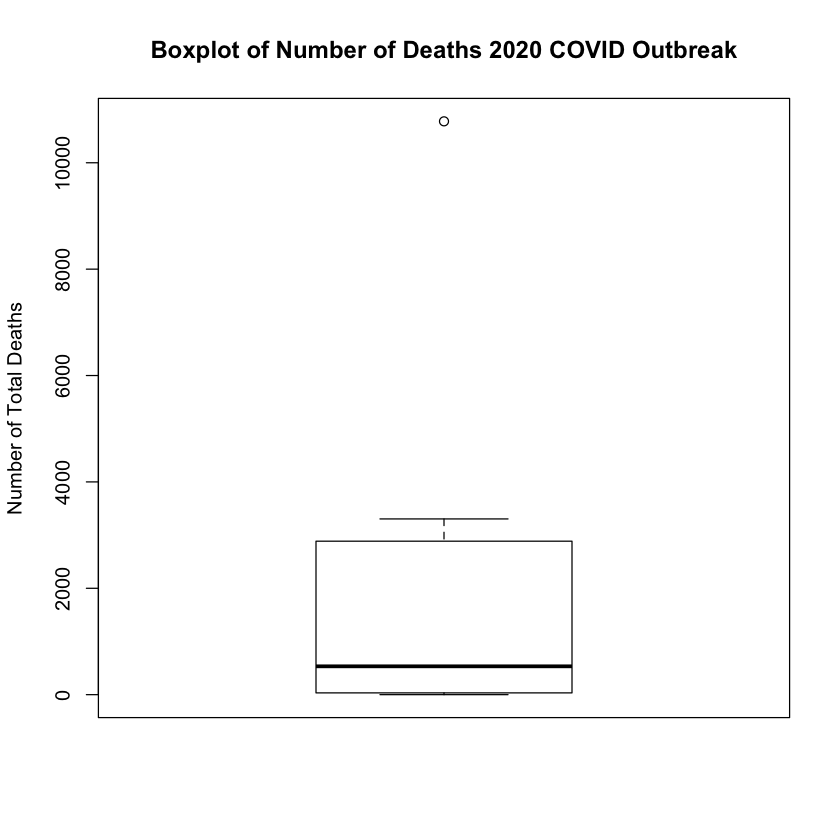

In [8]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak", breaks = 20)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

The distribution is positively skewed. The kurtosis value indicates that the distribution does not have lighter or heavier tails.The total deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals in each selected country during the COVID-19 outbreak (excluding Italy).

Skewness:  0.5740831 
Kurtosis:  -1.767573

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,18.25,298.5,1983.5,3304,1061.833,1450.914,6,0


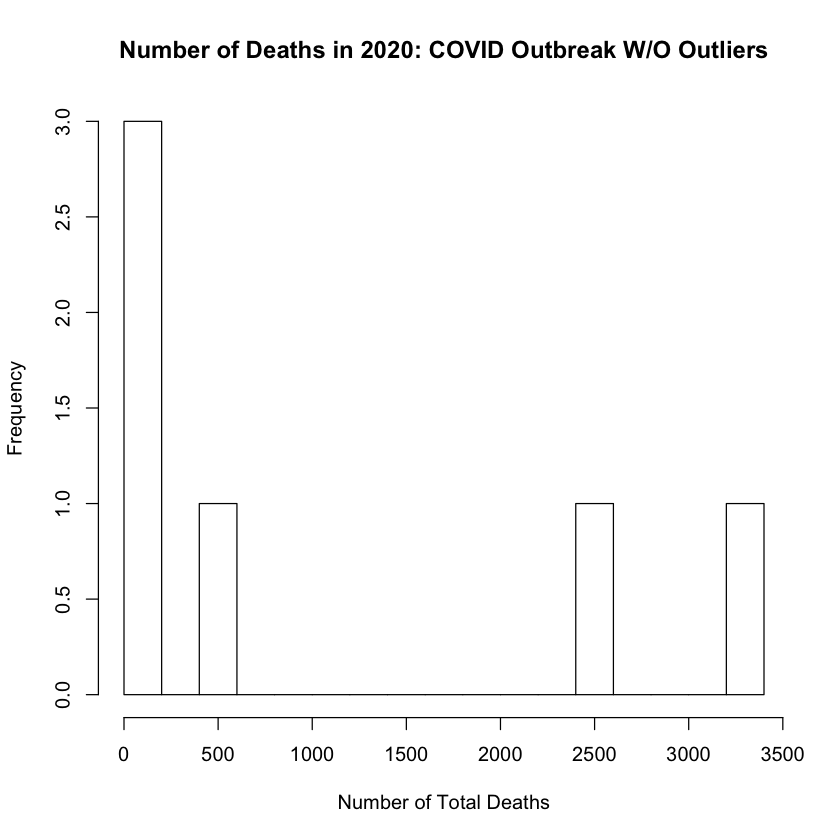

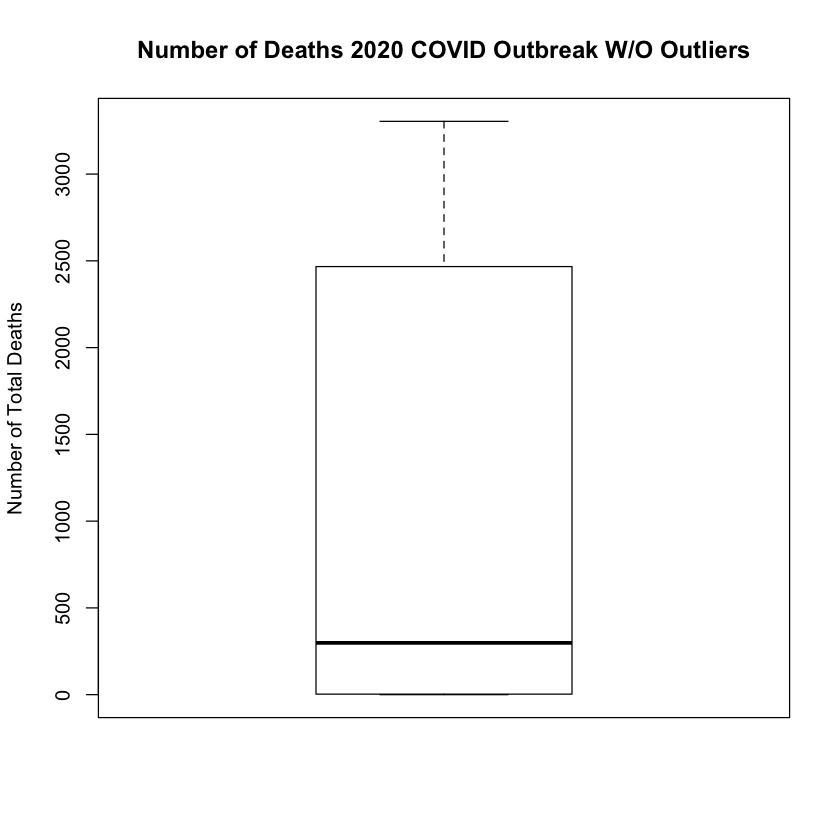

In [9]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Number of Deaths in 2020: COVID Outbreak W/O Outliers", breaks = 15)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Number of Deaths 2020 COVID Outbreak W/O Outliers")

The removal of Italy created a new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Italy significantly lowered the skewness of the data. 

This loop calculates the percentage of the population that were infected by SARS in each selected country.

In [10]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

pop <- c(31644028, 82534176, 57313203, 4114826, 290107933, 82301656, 1288000000)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

[1] 7.963588e-06 1.211619e-07 1.570319e-07 5.006287e-05 7.583384e-07
[6] 7.654767e-07 5.500000e-06

The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the SARS outbreak.

Skewness:  1.528458 
Kurtosis:  0.6016141

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.211619e-07,4.576852e-07,7.654767e-07,6.731794e-06,5.006287e-05,9.332638e-06,1.821846e-05,7,0


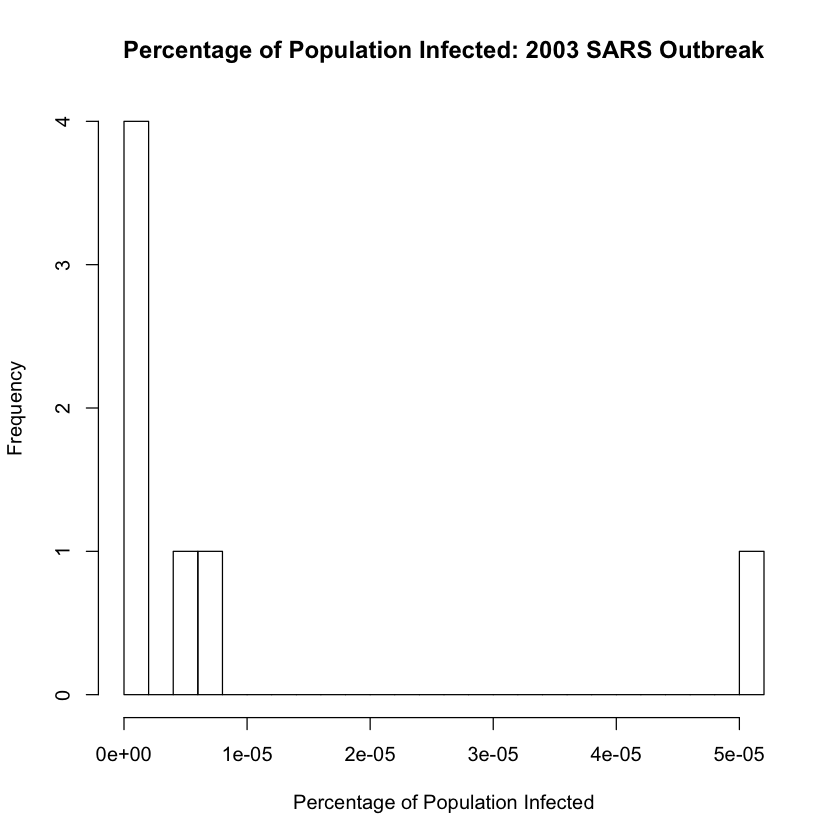

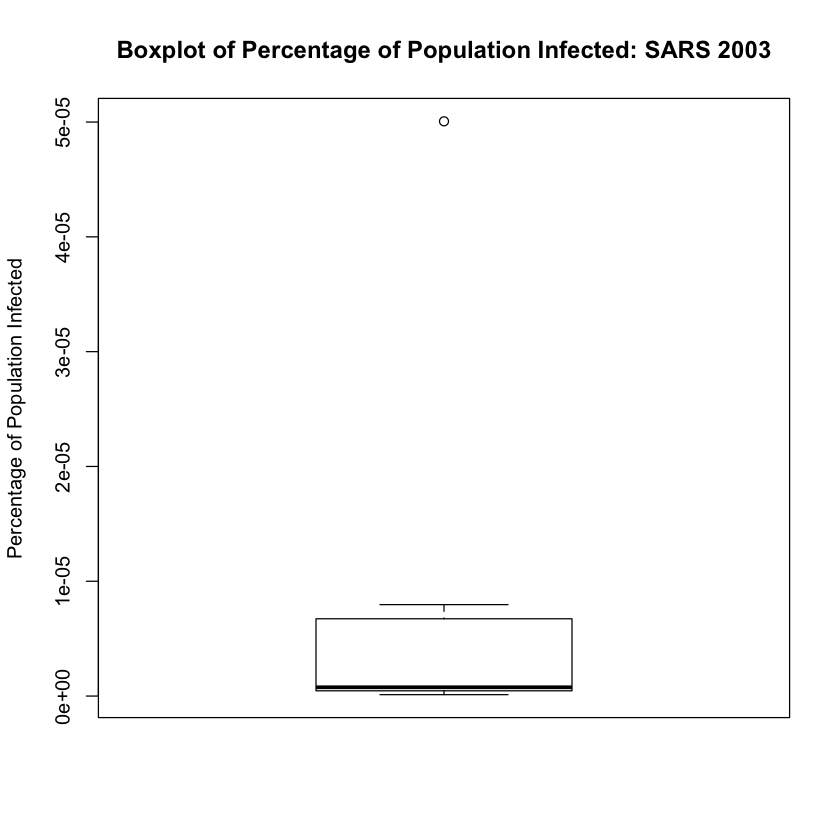

In [11]:
hist(t2003, xlab ='Percentage of Population Infected', main = "Percentage of Population Infected: 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Percentage of Population Infected", main = "Boxplot of Percentage of Population Infected: SARS 2003")

The distribution is positively skewed. The kurtosis value indicates that the distribution has heavier tails. The percentage of infected population in Singapore seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [12]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

pop <- c(31644028, 82534176, 57313203, 290107933, 82301656, 1288000000)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

[1] 7.963588e-06 1.211619e-07 1.570319e-07 7.583384e-07 7.654767e-07
[6] 5.500000e-06

The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the SARS outbreak (excluding Singapore).

Skewness:  0.6479129 
Kurtosis:  -1.638226

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.211619e-07,3.073585e-07,7.619076e-07,4.316369e-06,7.963588e-06,2.544266e-06,3.347517e-06,6,0


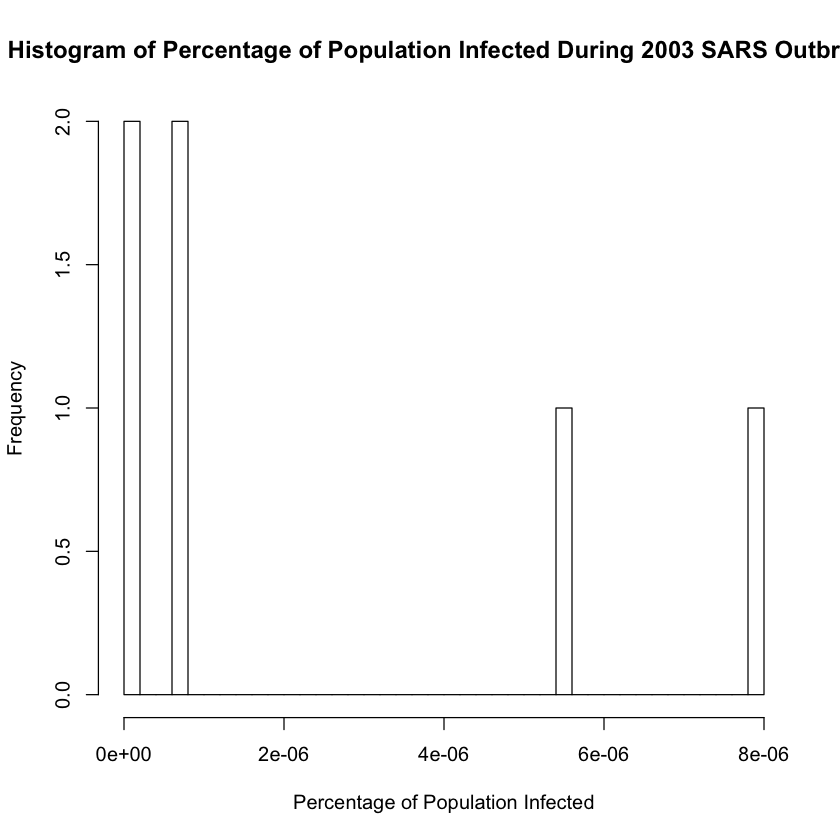

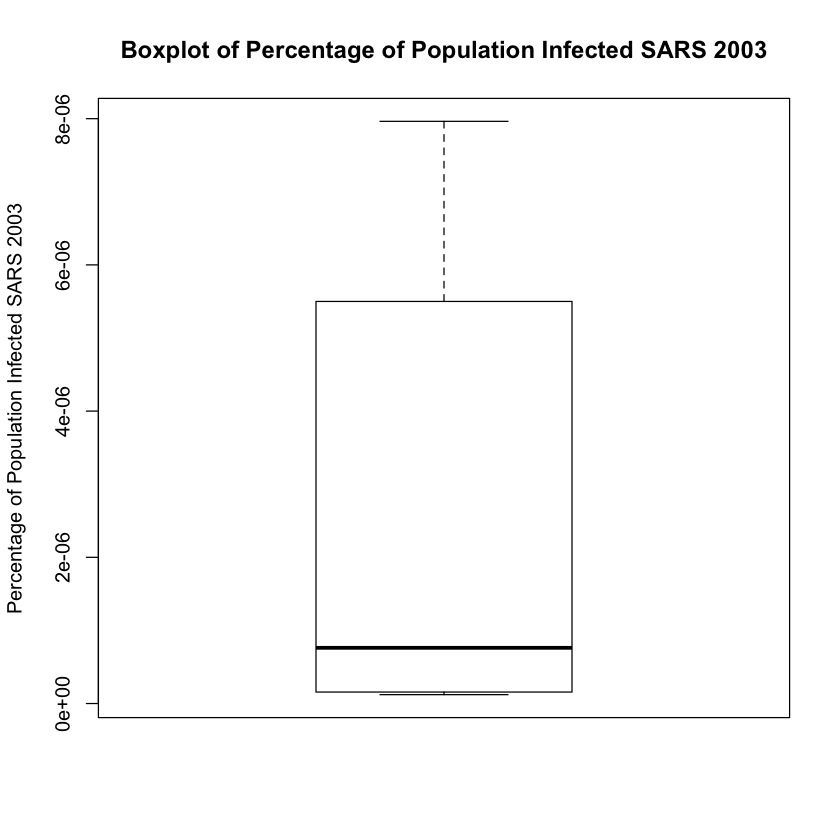

In [13]:
hist(t2003, xlab ='Percentage of Population Infected', main = "Histogram of Percentage of Population Infected During 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Percentage of Population Infected SARS 2003", main = "Boxplot of Percentage of Population Infected SARS 2003")

The removal of Singapore created an new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Singapore significantly lowered the skewness of the data.

This for loop finds the percentage of confirmed cases that resulted in deaths in the 2003 SARS outbreak. 

In [14]:
td2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

d2003 <- c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)

for (i in 1:length(d2003)) {
    td2003[i] <- d2003[i]/td2003[i]
}

td2003

[1] 0.15079365 0.00000000 0.00000000 0.15533981 0.00000000 0.07936508 0.09119142

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each country during the SARS outbreak.

Skewness:  0.125633 
Kurtosis:  -1.964987

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,0.07936508,0.1209925,0.1553398,0.06809856,0.06954851,7,0


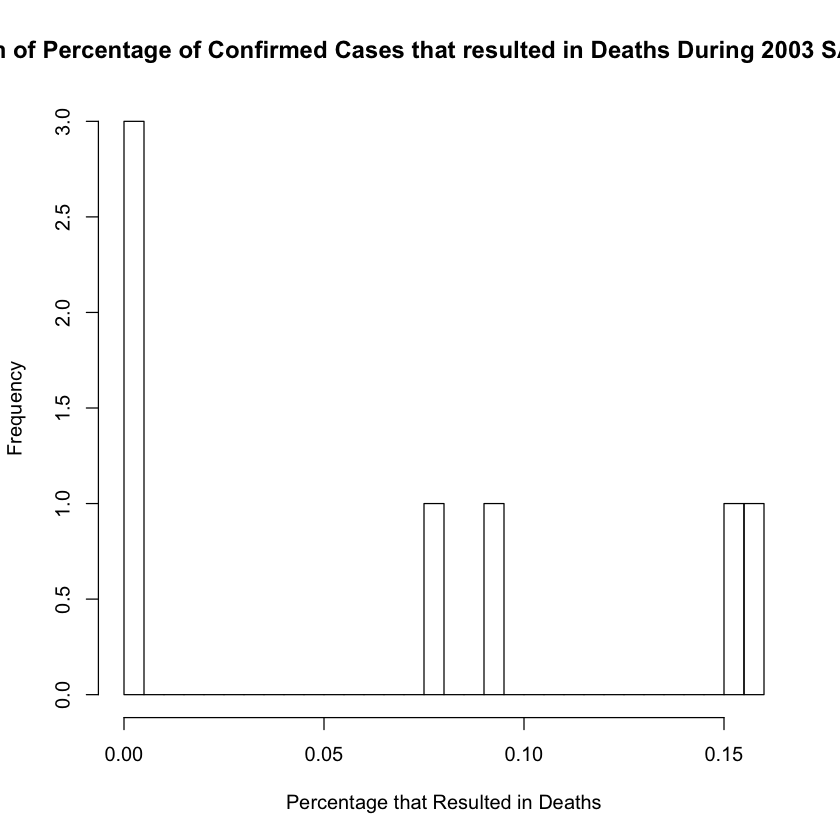

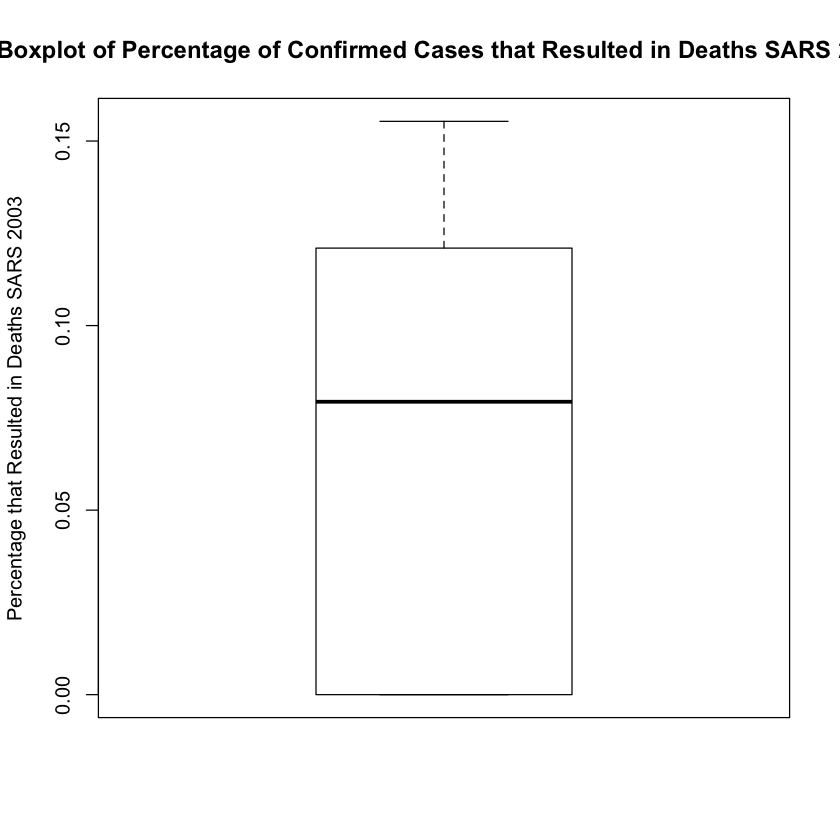

In [15]:
hist(td2003, xlab ='Percentage that Resulted in Deaths', main = "Histogram of Percentage of Confirmed Cases that resulted in Deaths During 2003 SARS Outbreak", breaks = 30)
skew <- skewness(td2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2003)
cat("Kurtosis: ", k)

favstats(td2003)
boxplot(td2003, ylab = "Percentage that Resulted in Deaths SARS 2003", main = "Boxplot of Percentage of Confirmed Cases that Resulted in Deaths SARS 2003")

The distribution is slightly positively skewed. The kurtosis value indicates that the distribution has lighter tails. 
There are no outliers for this distribution. Singapore has the highest percentage of confirmed cases resulting in deaths, but Canada is a close second. 

This loop calculates the percentage of the population that were infected by COVID-19 in each country.

In [16]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

pop <- c(37057765, 82905782, 60421760, 5638676, 326687501, 95540395, 1393000000)

for (i in 1:length(pop)) {
    t2020[i] <- t2020[i]/pop[i]
}
t2020

[1] 1.694652e-04 7.489827e-04 1.616785e-03 1.496805e-04 4.312562e-04
[6] 1.967754e-06 5.895334e-05

The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the COVID-19 outbreak.

Skewness:  1.055147 
Kurtosis:  -0.4679947

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.967754e-06,0.0001043169,0.0001694652,0.0005901195,0.001616785,0.0004538701,0.0005735222,7,0


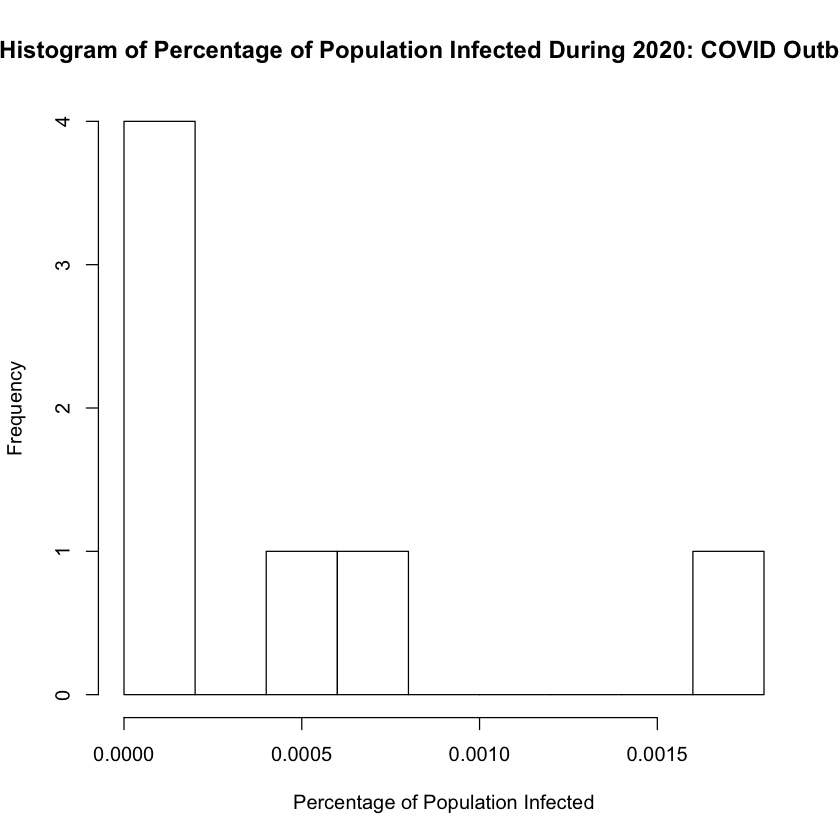

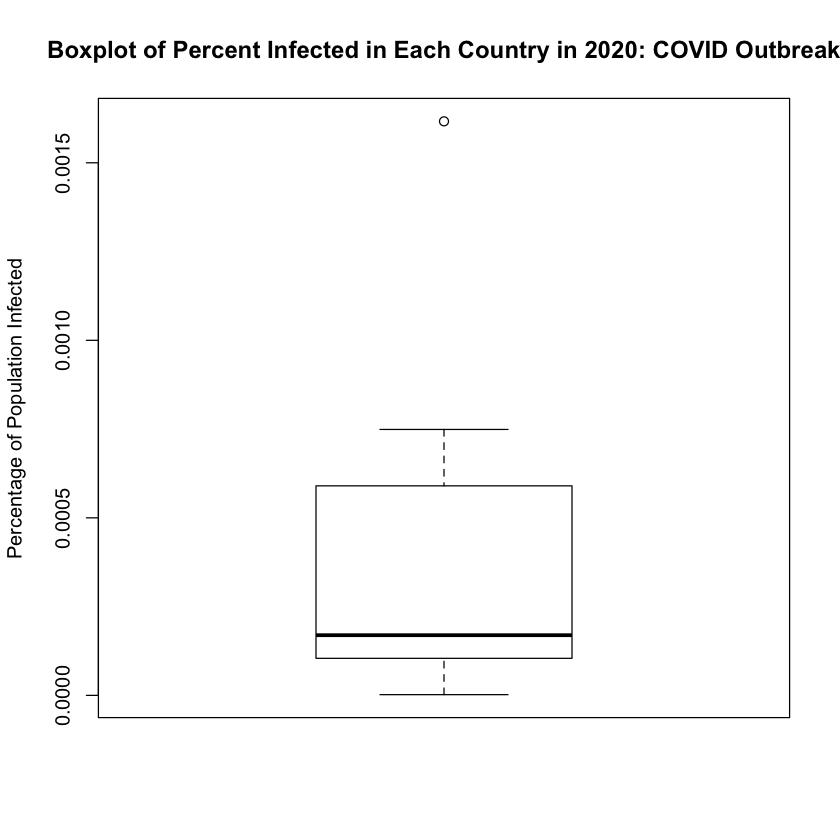

In [17]:
hist(t2020, xlab ='Percentage of Population Infected', main = "Histogram of Percentage of Population Infected During 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Percentage of Population Infected", main = "Boxplot of Percent Infected in Each Country in 2020: COVID Outbreak")

The distribution is positively skewed. The kurtosis value indicates that the distribution has lighter tails. The percentage of infected population in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [18]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

pop <- c(37057765, 82905782, 5638676, 326687501, 95540395, 1393000000)

for (i in 1:length(pop)) {
    t2020[i] <- t2020[i]/pop[i]
}
t2020

[1] 1.694652e-04 7.489827e-04 1.496805e-04 4.312562e-04 1.967754e-06
[6] 5.895334e-05

The histogram and boxplot are displaying the distribution of the percentage of infected in each country during the COVID-19 outbreak (excluding Italy).

Skewness:  0.7070849 
Kurtosis:  -1.289963

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.967754e-06,8.163514e-05,0.0001595728,0.0003658084,0.0007489827,0.0002600509,0.0002813539,6,0


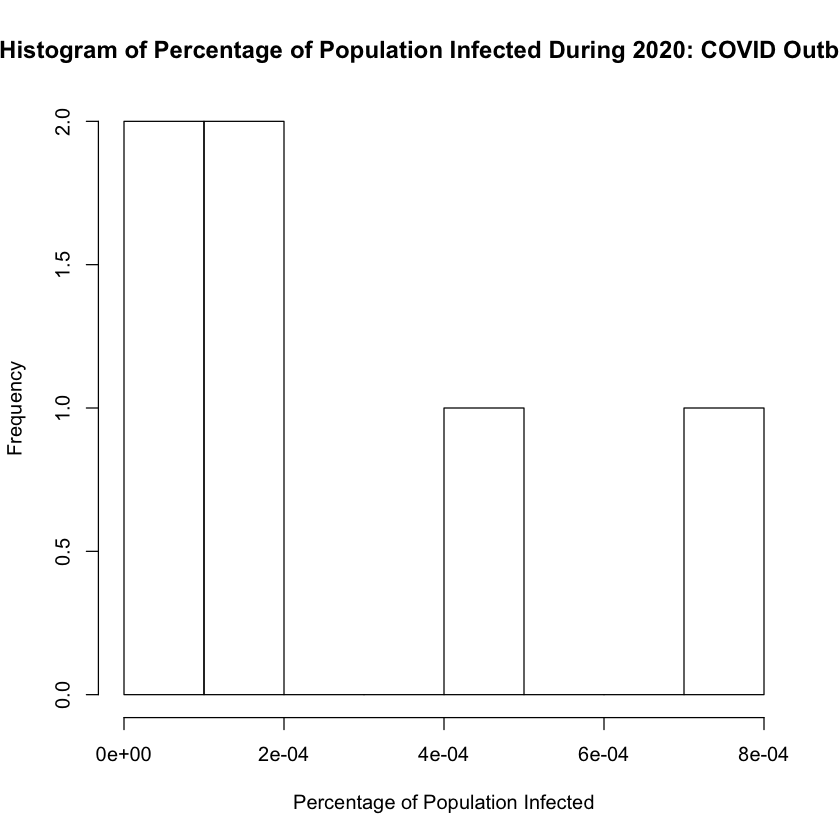

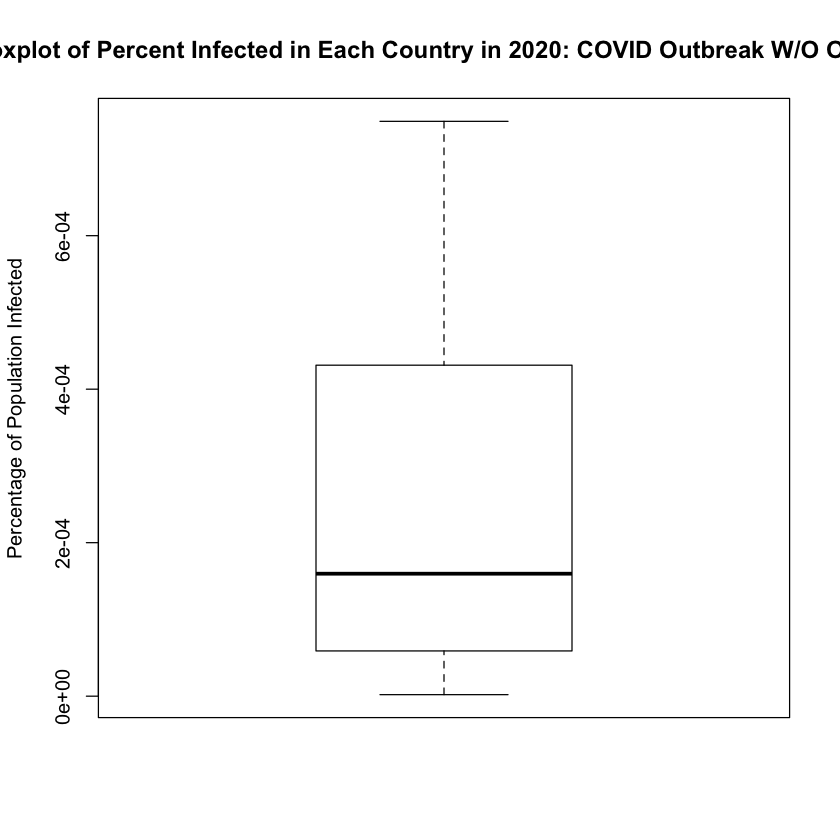

In [19]:
hist(t2020, xlab ='Percentage of Population Infected', main = "Histogram of Percentage of Population Infected During 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Percentage of Population Infected", main = "Boxplot of Percent Infected in Each Country in 2020: COVID Outbreak W/O Outliers")

With the removal of Italy, the tails became lighter and the skew became smaller. However, the skew stayed positive. 

This for loop finds the percentage of confirmed cases that resulted in deaths during the COVID-19 outbreak. 

In [20]:
td2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

d2020 <- c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)

for (i in 1:length(d2020)) {
    td2020[i] <- d2020[i]/td2020[i]
}

td2020

[1] 0.010191083 0.008583622 0.110339956 0.003554502 0.017510611 0.000000000
[7] 0.040232824

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each selected country during the COVID-19 outbreak.

Skewness:  1.282536 
Kurtosis:  0.02826117

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0.006069062,0.01019108,0.02887172,0.11034,0.0272018,0.03896754,7,0


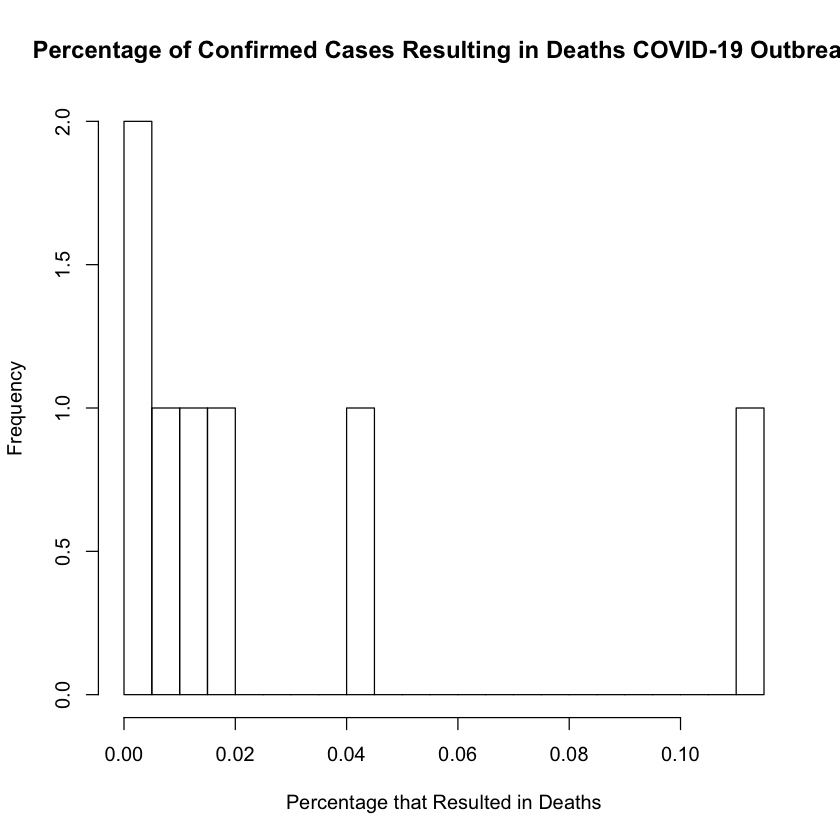

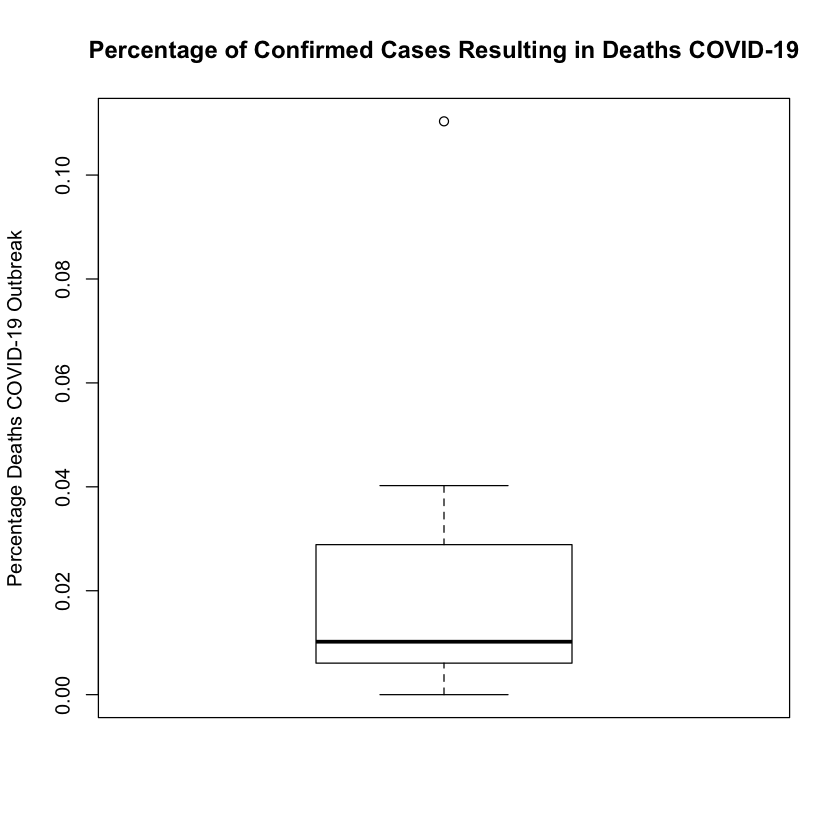

In [21]:
hist(td2020, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19 Outbreak", breaks = 30)
skew <- skewness(td2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2020)
cat("Kurtosis: ", k)

favstats(td2020)
boxplot(td2020, ylab = "Percentage Deaths COVID-19 Outbreak", main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19")

The distribution is positively skewed. The kurtosis value indicates that the distribution has heavier tails. The percentage of cases resulting in deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [22]:
td2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

d2020 <- c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)

for (i in 1:length(d2020)) {
    td2020[i] <- d2020[i]/td2020[i]
}

td2020

[1] 0.010191083 0.008583622 0.003554502 0.017510611 0.000000000 0.040232824

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each selected country during the COVID-19 outbreak (excluding Italy).

Skewness:  0.8832466 
Kurtosis:  -0.8539844

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0.004811782,0.009387352,0.01568073,0.04023282,0.01334544,0.01446975,6,0


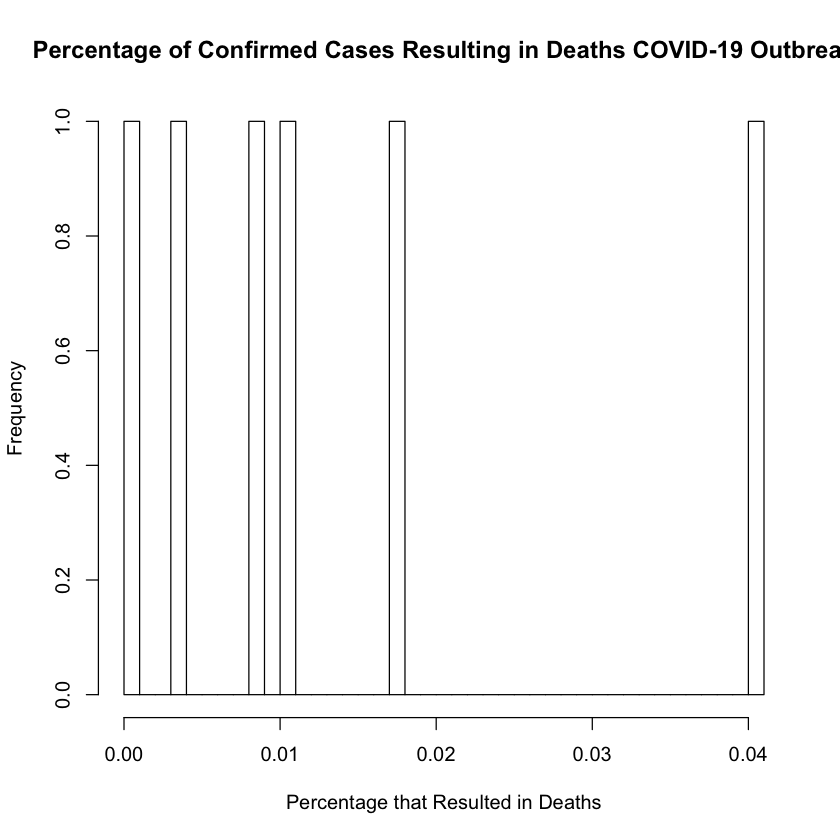

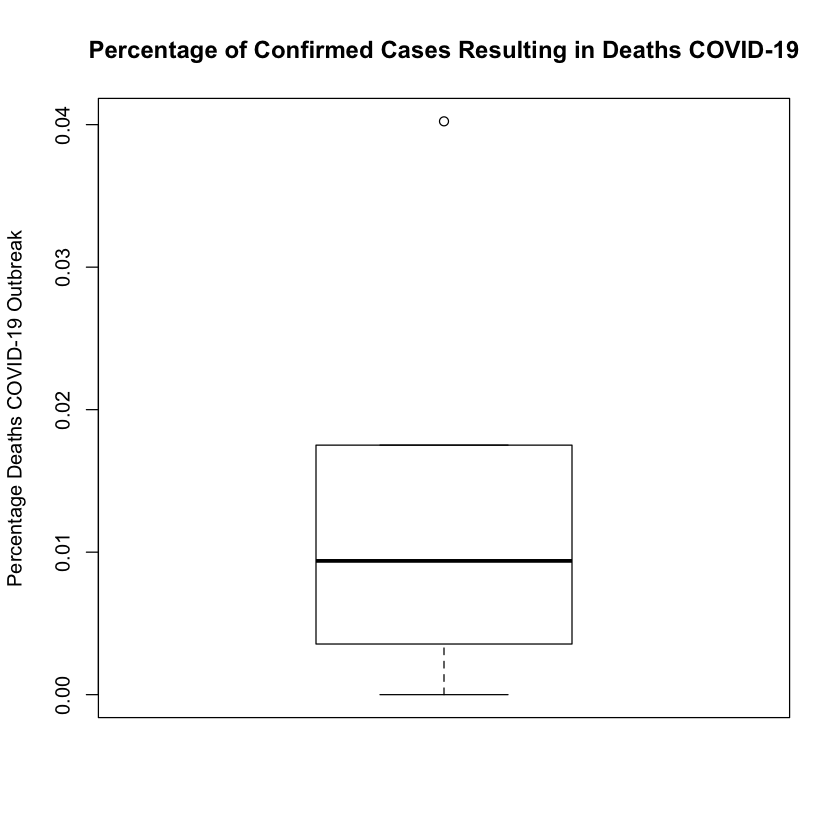

In [23]:
hist(td2020, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19 Outbreak", breaks = 30)
skew <- skewness(td2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2020)
cat("Kurtosis: ", k)

favstats(td2020)
boxplot(td2020, ylab = "Percentage Deaths COVID-19 Outbreak", main = "Percentage of Confirmed Cases Resulting in Deaths COVID-19")

With the removal of Italy, the new distribution decreased in skewness. The tails of the distribution became lighter. China is the outlier of this distribution.

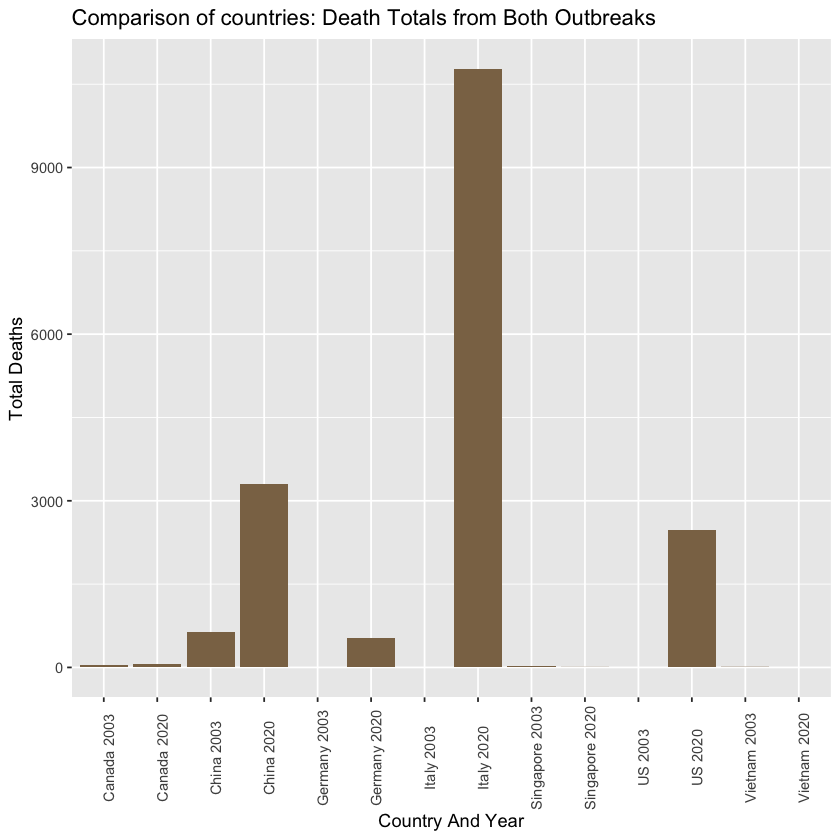

In [24]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(totDLD$Canada.2020, totDLD$Canada.2003, totDLD$Germany.2020, totDLD$Germany.2003,
                          totDLD$Italy.2020, totDLD$Italy.2003, totDLD$Singapore.2020, totDLD$Singapore.2003,
                          totDLD$US.2020, totDLD$US.2003, totDLD$Vietnam.2020, totDLD$Vietnam.2003,
                          totDLD$China.2020, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'burlywood4') + 
                    ggtitle("Comparison of countries: Death Totals from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

The barchart shows that the number of deaths in each selected country is mostly larger for the COVID-19 outbreak. The exceptions to this claim are Singapore and Vietnam. The total number of deaths in China's SARS 2003 outbreak is slightly larger than Germany's COVID-19 death total. 

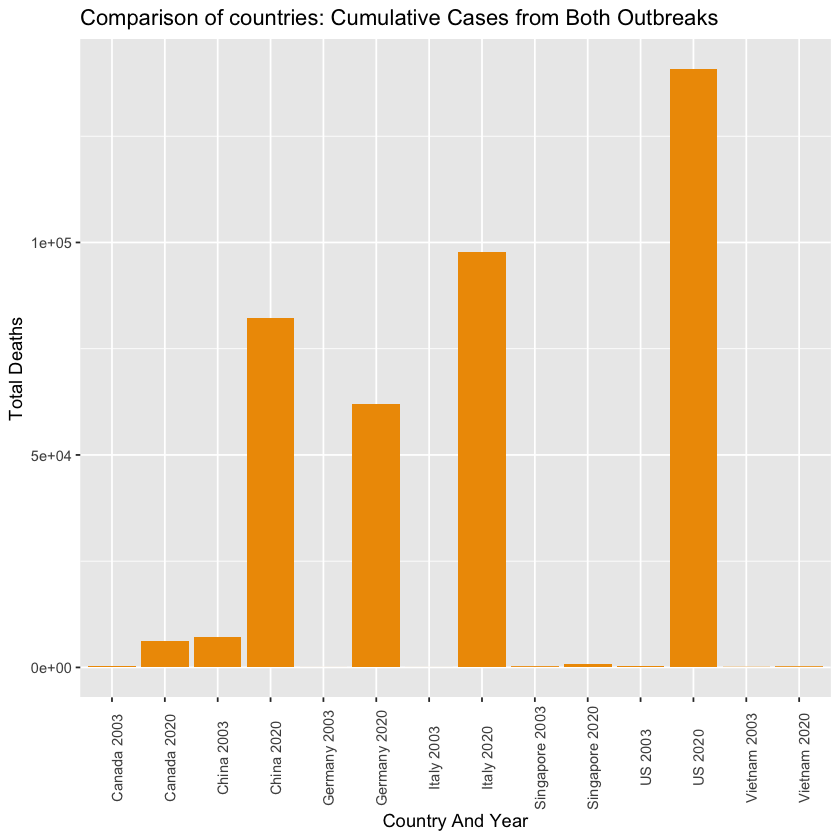

In [25]:
data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(cumulSC$Canada.2020, cumulSC$Canada.2003, cumulSC$Germany.2020, cumulSC$Germany.2003,
                          cumulSC$Italy.2020, cumulSC$Italy.2003, cumulSC$Singapore.2020, cumulSC$Singapore.2003,
                          cumulSC$US.2020, cumulSC$US.2003, cumulSC$Vietnam.2020, cumulSC$Vietnam.2003,
                          cumulSC$China.2020, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'orange2') + 
                    ggtitle("Comparison of countries: Cumulative Cases from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

The barchart shows that the number of cumulative cases in each selected country is mostly larger for the COVID-19 outbreak.  The total number of cumulative cases in China's SARS 2003 outbreak is slightly larger than Canada's COVID-19 total of cumulative cases.

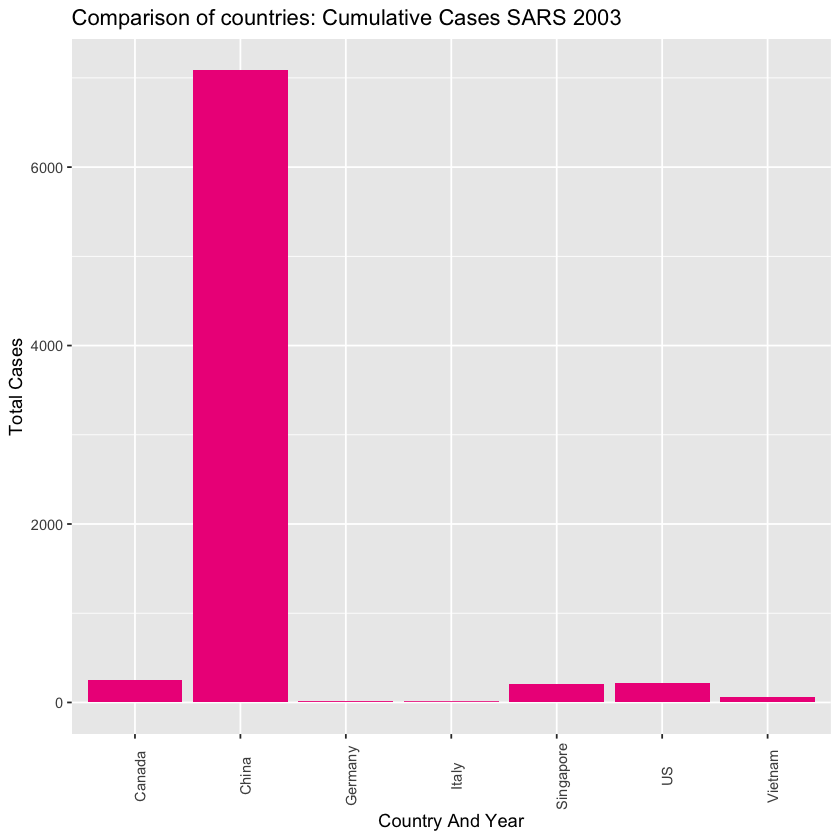

In [26]:
data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003,
                        cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'deeppink2') + 
                    ggtitle("Comparison of countries: Cumulative Cases SARS 2003") + xlab("Country And Year") + ylab("Total Cases") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

This barchart shows that China has the most cases out of the selected countries. The US, Singapore,and Canada seem to have a similar number of cumulative cases. 

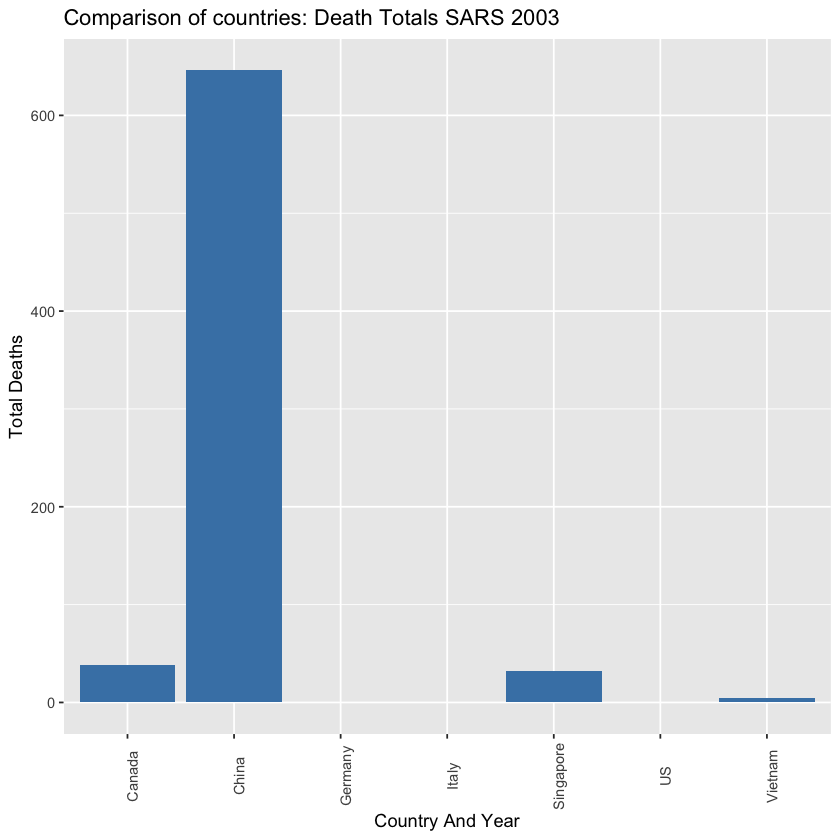

In [27]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003,
                           totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill="steelblue") + 
                    ggtitle("Comparison of countries: Death Totals SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

This barchart shows that China had the highest number of deaths. Canada and Singapore had a similar number of deaths during the SARS outbreak. The United States, Germany, and Italy did not have a case that resulted in death.  

In [28]:
library(pwr)
library(distr)

Loading required package: startupmsg

Utilities for Start-Up Messages (version 0.9.6)

For more information see ?"startupmsg", NEWS("startupmsg")


Loading required package: sfsmisc


Attaching package: ‘sfsmisc’


The following object is masked from ‘package:mosaic’:

    factorize


The following object is masked from ‘package:dplyr’:

    last


Object Oriented Implementation of Distributions (version 2.8.0)

Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global options are controlled by distroptions() ---c.f. ?"distroptions".

For more information see ?"distr", NEWS("distr"), as well as
  http://distr.r-forge.r-project.org/
Package "distrDoc" provides a vignette to this package as well as to several extension packages; try vignette("distr").



Attaching package: ‘distr’


The following object is masked 

In [29]:
pwr.t.test(n = 96, d = 0.5, sig.level = 0.05, alternative = "greater")


     Two-sample t test power calculation 

              n = 96
              d = 0.5
      sig.level = 0.05
          power = 0.9646091
    alternative = greater

NOTE: n is number in *each* group


The t tests comparing the death totals, in selected countries, from the 2003 SARS Outbreak will have 96.4% power. 

In [30]:
pwr.t.test(d=0.5, sig.level = 0.05, power = 0.8, alternative = "greater")


     Two-sample t test power calculation 

              n = 50.1508
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


50 days of SARS data needs to be collected in each country to have 0.8 power. 

In [31]:
dfSC <- dfSC %>%
            rename(CanadaC = Canada,
              GermanyC = Germany,
              ItalyC = Italy,
              SingaporeC = Singapore,
              United.StatesC = United.States,
              VietnamC = Vietnam,
              ChinaC = China)

dfSD <- dfSD %>%
            rename(CanadaD = Canada,
              GermanyD = Germany,
              ItalyD = Italy,
              SingaporeD = Singapore,
              United.StatesD = United.States,
              VietnamD = Vietnam,
              ChinaD = China)

dfSA <- cbind(dfSC, dfSD)

dfSA 

dfSD <- dfSD %>% 
   mutate(adjCanada = Canada / 31644028)

In [32]:
dfSA

Date,CanadaC,GermanyC,ItalyC,SingaporeC,United.StatesC,VietnamC,ChinaC,Date,Canada,Germany,Italy,Singapore,United.States,Vietnam,China
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2003-03-17,8,1,0,20,0,40,95,2003-03-17,2,0,0,0,0,1,1
2003-03-18,8,1,0,23,0,56,123,2003-03-18,2,0,0,0,0,1,1
2003-03-19,8,1,0,31,11,57,150,2003-03-19,2,0,0,0,0,2,5
2003-03-20,9,1,0,34,11,58,173,2003-03-20,2,0,0,0,0,2,6
2003-03-21,9,2,1,39,13,58,203,2003-03-21,2,0,0,0,0,2,6
2003-03-22,9,2,2,44,22,58,222,2003-03-22,2,0,0,0,0,2,7
2003-03-24,11,4,2,65,37,58,260,2003-03-24,3,0,0,0,0,4,10
2003-03-25,11,4,2,69,37,58,286,2003-03-25,3,0,0,0,0,4,10
2003-03-26,19,4,2,74,38,58,1108,2003-03-26,3,0,0,1,0,4,41


In [ ]:
dfSD <- dfSD %>% 
   mutate(adjCanada = Canada / 31644028)

dfSD <- dfSD %>% 
   mutate(adjGermany = Germany / 82534176)

dfSD <- dfSD %>%
   mutate(adjItaly = Italy / 57313203)

dfSD <- dfSD %>%
   mutate(adjSingapore = Singapore / 4114826)

dfSD <- dfSD %>% 
   mutate(adjUS = United.States / 290107933)

dfSD <- dfSD %>%
   mutate(adjVietnam = Vietnam / 82301656)

dfSD <- dfSD %>% 
   mutate(adjChina = China / 1288000000)

dfSD

In [ ]:
ttest = t.test(dfSD$China, dfSD$Canada, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean of the percent of population dead from SARS between the two countries. 
Alternative hypothesis: This is a difference in the mean percent of population dead  between the two countries.

China will recieve the most severe average day classification. The t-test indicates that China has significantly more mean deaths per day than the country with the second highest mean deaths per day (Canada). The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid. 

Reject the null hypothesis for the t-test between China and Canada. 

In [ ]:
ttest = t.test(dfSD$Canada, dfSD$Singapore, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Canada and Singapore will be placed in the second most severe classification. The t-test indicates that there is no significant difference between the mean deaths per day of the two countries. The 95% confidence interval contains the value 0 and the p-value is above 0.05. Therefore, this conclusion is valid.

Fail to reject the null hypothesis for the t-test between Singapore and Canada.

In [ ]:
ttest = t.test(dfSD$Singapore, dfSD$Vietnam, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Vietnam will be placed in the third most severe classification. The t-test indicates that there is a significant difference in the mean deaths per day between Vietnam and Singapore. The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid.
Singapore has a lower death total than Canada. Therefore, it can be assumed that Vietnam's mean deaths per day will have a significant difference from Canada's mean deaths per day. 

Reject the null hypothesis for the t-test between Singapore and Vietnam. 

In [ ]:
ttest = t.test(dfSD$Vietnam, dfSD$United.States, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

United States will be placed in the fourth most severe classification. The t-test indicates that there is a significant difference in the mean deaths per day between Vietnam and the United States. The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid.

Reject the null hypothesis for the t-test between Vietnam and United States. 

In [ ]:
ttest = t.test(dfSD$United.States, dfSD$Germany, alternative = "greater", paired = FALSE)
ttest

Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Fail to reject the null hypothesis for the t-test between Germany and United States.

Germany, Italy, and United States did not experience a death during the outbreak. They will be placed in the fourth classification. The t-test does not have anything to compare. 

In [ ]:
dfW_7$classification <- c(2,1,4,4,2,4,3)
dfW_7

In [ ]:
library(magrittr)

In [ ]:
dfW_20 = read.csv("WHOselect20.csv", header = T)

In [ ]:
dfW_20$classification <- c(0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1)
dfW_20

In [ ]:
dfW_20 %<>% mutate_if(is.integer,as.numeric)
dfW_20

In [ ]:
write.csv(dfW_20,"dfW20.csv", row.names = TRUE)

In [ ]:
dfW20 = read.csv("dfW20.csv", header = T)

In [ ]:
library(caret)
library(randomForest)
library(varImp)
library(naivebayes)

In [ ]:
sapply(dfW20, class)

In [ ]:
df <- dfW20 
df
#0 means less than 5 deaths
#1 means 5 or more deaths occured

In [ ]:
model_1 <- glm(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
             family = "binomial", data = df) 
summary(model_1)

In [ ]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

In [ ]:
X <- caret::varImp(model)
plot(X)
X

There are three variables above 65 importance. Those variables will be chosen for the second model. 

In [ ]:
model_2 <- glm(classification ~ Percentage.of.population.aged.60. + Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_2)

In [ ]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Percentage.of.population.aged.60. + Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

In [ ]:
X <- caret::varImp(model)
plot(X)
X

In [ ]:
model_3 <- glm(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_3)

In [ ]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

In [ ]:
X <- caret::varImp(model)
plot(X)
X

In [ ]:
model_4 <- glm(classification ~ Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_4)

In [ ]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

In [ ]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data

xvars.train <- as.matrix(df[trainingRowIndex,3:29])
xvars.test <- as.matrix(df[-trainingRowIndex,3:29])

y.train <- as.matrix(df[trainingRowIndex, 30])
y.test <- as.matrix(df[-trainingRowIndex, 30])

In [ ]:
library(glmnet)
fitlasso <- glmnet(xvars.train, y.train, family="binomial", alpha=1)
fitridge <- glmnet(xvars.train, y.train, family="binomial", alpha=0)
fitelnet <- glmnet(xvars.train, y.train, family="binomial", alpha=.5)

In [ ]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(xvars.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="binomial"))
}

In [ ]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC

AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=xvars.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=xvars.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=xvars.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=xvars.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=xvars.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=xvars.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

In [ ]:
dfSC = read.csv("CumulativeCases.csv", header = T)

In [ ]:
dfSC$China[1]

In [ ]:
class(dfSC$Date)
dfSC$Date <- as.character(dfSC$Date)
dfSC$Date <- as.POSIXct(dfSC$Date)

In [ ]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China/7084)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            stat_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE) + 
            ylab("Percentage of Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")


In [ ]:
log_reg <- glm(China/7084 ~ seq(1,96,1), data = dfSC, family = binomial)

log_reg

In [ ]:
library(stats)

In [ ]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            ylab("Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")

In [ ]:
#find the parameters for the equation
times <- seq(1,96,1)
SS<-getInitial(dfSC$China~SSlogis(times,alpha,xmid,scale),data=data.frame(dfSC$China==dfSC$China,times=times))
SS

In [ ]:
K_0<-SS["alpha"]
R_0<-1/SS["scale"]
N0<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
y <- dfSC$China

m<-nls(y~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)),start=list(K=K_0,R=R_0,N0=N0))
#estimated parameters
summary(m)

c <- cor(y,predict(m))
cat("correlation coefficient: ", c, "\n")

AIC <- AIC(m)
cat("AIC: ", AIC)

In [ ]:
Days = times
Total_cases = dfSC$China

plot(Days, Total_cases) + lines(times,predict(m),col="red", lty=1,lwd=3)
title(main = "Cumulative Cases in China SARS Outbreak 2003")

In [ ]:
yC = read.csv("Comp20032020.csv")

In [ ]:
str(yC)

In [ ]:
yC

In [ ]:
library(lattice)
histogram(~Cumulative.Cases|factor(Year),
         data = yC,
         layout = c(1,2),
         nint = 1,
         xlab = "Cumulative Cases",
         strip = FALSE,
         strip.left = TRUE,
         breaks=seq(from=0,to=150000,by=10000),
         ylab = "Percentage of the Data")

100 percent of the data is below 5000 cumulative cases in 2003. 